In [1]:
import cv2
import numpy as np
import math
import pandas as pd
import codecs
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences

In [2]:
import os
os.chdir("/content/drive/MyDrive/Doctors_Handwritting_Reccgnition_Model_Test/")

In [3]:
window_height=64
window_width=64
window_shift=window_width-2
MPoolLayers_H=2
strides=4

In [4]:
data = []

with open('Data/class.txt', 'r') as file:
    for line in file:
        data.append(line.split("\n")[0])

In [5]:
print(data)

['<SPACE>', '<UNK>', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~']


In [6]:
def returnClasses(string):
    text = list(string)
    text = ["<SPACE>"] + ["<SPACE>" if x==" " else x for x in text] + ["<SPACE>"]
    classes = [data.index(x) if x in data else 2 for x in text]
    classes = np.asarray(classes)
    return classes

In [7]:
infile=pd.read_csv("Data/Train.csv")

In [8]:
returnClasses(infile['Annotation'][0])

array([ 0, 32,  0, 44, 46, 53, 36,  0, 81, 76,  0, 80, 81, 76, 77,  0, 44,
       79, 15,  0, 38, 62, 70, 81, 80, 72, 66, 73, 73,  0, 67, 79, 76, 74,
        0])

In [9]:
def find_max_width(path):
    infile = pd.read_csv(path)
    max_width = 0
    for record in range(0, len(infile)):
        path = infile["Path"][record]

        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        h, w = np.shape(image)

        if (h > window_height):
          factor = window_height/h
        elif (h<= window_height):
          factor=window_height/h



        image = cv2.resize(image, None, fx=factor, fy=factor, interpolation = cv2.INTER_CUBIC)
        h, w = np.shape(image)

        if w / window_width < math.ceil(w / window_width):
            padding = np.full((window_height, math.ceil(w / window_width) * 64 - w), 255)
            image = np.append(image, padding, axis = 1)

        h, w = np.shape(image)
        if w > max_width: max_width = w
    return(max_width)

In [10]:
max_width=find_max_width("Data/Train.csv")

In [11]:
max_width

2048

In [12]:
def prepare_data(file):
  x_train = []
  x_train_len=[]
  y_train=[]
  y_train_len=[]
  for index, row in file.iterrows():

    image_path = row['Path']
    annotation= row['Annotation']
    #print(annotation)

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = image.shape

    if (h > window_height):
        factor = window_height/h
    elif (h<= window_height):
        factor=window_height/h



    image = cv2.resize(image, None, fx=factor, fy=factor, interpolation = cv2.INTER_CUBIC)
    h, w = np.shape(image)

    h, w = image.shape
    x_train_len.append(np.array(w))

    if w < max_width:
        padding = np.full((window_height, max_width-w), 255)
        image = np.concatenate((image, padding), axis=1)

    h, w = image.shape

    n_frames = int((max_width-window_width)/4)+1
    frames = []

    for i in range(n_frames):
        start_pix = i*strides
        end_pix = start_pix + window_width
        frame = image[:,start_pix:end_pix]
        frame = cv2.resize(frame, (window_width, window_height))
        frame = np.expand_dims(frame, axis=-1)
        frames.append(frame)
    x_train.append(np.array(frames))
    y_train.append(returnClasses(annotation))
    #print(y_train)
    y_train_len=np.array([len(y_train[i]) for i in range(len(y_train))])
    y_train_pad=pad_sequences(y_train,padding='post',value=float(len(data)),dtype='float32')


  x_train = np.array(x_train)
  x_train_len=np.array(x_train_len)
  return x_train,y_train_pad,x_train_len,y_train_len

In [13]:
x_train,y_train,x_train_len,y_train_len=prepare_data(infile)

In [14]:
import matplotlib.pyplot as plt

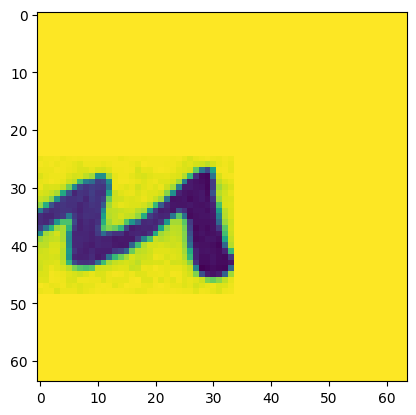

In [15]:
plt.imshow(x_train[0][290])

In [16]:
x_train.shape

(200, 497, 64, 64, 1)

In [17]:
x_train_len.shape

(200,)

In [18]:
y_train.shape

(200, 67)

In [19]:
y_train_len.shape

(200,)

In [20]:
val_infile=pd.read_csv("Data/Validation.csv")
val_infile

,Path,Annotation
0,Data/Images/Test/R06-137-S00-00.PNG,The doorman turned his attention
1,Data/Images/Test/R06-137-S00-01.PNG,to the next red-eyed emerger from the
2,Data/Images/Test/R06-137-S00-02.PNG,dark; and we went an together to
3,Data/Images/Test/R06-137-S00-03.PNG,"the shakian, the children silent because"
4,Data/Images/Test/R06-137-S00-04.PNG,of the cruelty of the world.
5,Data/Images/Test/R06-137-S01-00.PNG,Finally Catherine
6,Data/Images/Test/R06-137-S01-01.PNG,"said, her eyes wet again:"
7,Data/Images/Test/R06-137-S02-00.PNG,ll think its all
8,Data/Images/Test/R06-137-S02-01.PNG,"absolutely beastly, and I can't bear to think"
9,Data/Images/Test/R06-137-S02-02.PNG,about it.'


In [21]:
x_val,y_val,x_val_len,y_val_len=prepare_data(val_infile)

In [22]:
x_val.shape

(15, 497, 64, 64, 1)

In [23]:
y_val.shape

(15, 47)

In [24]:
x_val_len.shape

(15,)

In [25]:
y_val_len.shape

(15,)

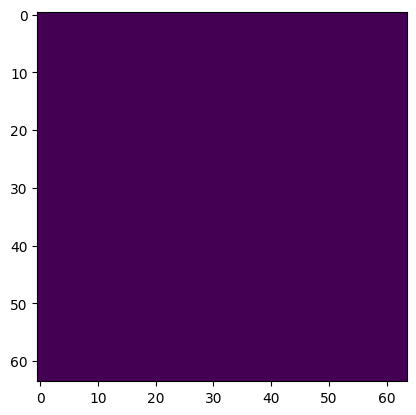

In [26]:
plt.imshow(x_val[0][350])

In [27]:
import keras
from keras.layers import BatchNormalization,Dense,LSTM,Flatten,MaxPooling2D,Conv2D,AvgPool2D,Dropout,Input,Lambda,Activation,Bidirectional,TimeDistributed
import keras.backend as K
from keras.optimizers import SGD
from keras.models import Model
from keras.optimizers.legacy import SGD
import pandas as pd
import numpy as np

In [28]:
x_train.shape[1:]

(497, 64, 64, 1)

In [29]:
input_data=Input(shape=x_train.shape[1:],name="input")
Conv_1=TimeDistributed(Conv2D(64,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_1.0")(input_data)
BN=TimeDistributed(BatchNormalization(),name="BN1")(Conv_1)
Conv_1=TimeDistributed(Conv2D(64,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_1.1")(BN)
BN=TimeDistributed(BatchNormalization(),name="BN2")(Conv_1)
Max_Pool_1=TimeDistributed(MaxPooling2D(pool_size=(2,2)),name="Max_pool_1")(BN)

Conv_2=TimeDistributed(Conv2D(128,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_2')(Max_Pool_1)
BN=TimeDistributed(BatchNormalization(),name="BN3")(Conv_2)
Conv_2=TimeDistributed(Conv2D(128,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_2.1')(BN)
BN=TimeDistributed(BatchNormalization(),name="BN4")(Conv_2)
Max_pool_2=TimeDistributed(MaxPooling2D(pool_size=(2,2)),name="Max_pool_2")(BN)

Conv_3=TimeDistributed(Conv2D(256,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_3.0')(Max_pool_2)
BN=TimeDistributed(BatchNormalization(),name="BN5")(Conv_3)
Conv_3=TimeDistributed(Conv2D(256,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_3.1')(BN)
BN=TimeDistributed(BatchNormalization(),name="BN6")(Conv_3)
Conv_3=TimeDistributed(Conv2D(256,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_3.2')(BN)
BN=TimeDistributed(BatchNormalization(),name="BN7")(Conv_3)
Max_pool_3=TimeDistributed(MaxPooling2D(pool_size=(2,2)),name="Max_pool_3")(BN)

Conv_4=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name='Conv_4.0')(Max_pool_3)
BN=TimeDistributed(BatchNormalization(),name="BN8")(Conv_4)
Conv_4=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_4.1")(BN)
BN=TimeDistributed(BatchNormalization(),name="BN9")(Conv_4)
Conv_4=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_4.2")(BN)
BN=TimeDistributed(BatchNormalization(),name="BN10")(Conv_4)
Max_pool_4=TimeDistributed(MaxPooling2D(pool_size=(2,2)),name="Max_pool_4")(BN)

Conv_5=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_5.0")(Max_pool_4)
BN=TimeDistributed(BatchNormalization(),name="BN11")(Conv_5)
Conv_5=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_5.1")(BN)
BN=TimeDistributed(BatchNormalization(),name="BN12")(Conv_5)
Conv_5=TimeDistributed(Conv2D(512,kernel_size=(1,1),activation='relu',kernel_initializer='he_normal'),name="Conv_5.2")(BN)
BN=TimeDistributed(BatchNormalization(),name="BN13")(Conv_5)
Max_pool_5=TimeDistributed(MaxPooling2D(pool_size=(2,2)),name="Max_Pool_5")(BN)

flatten=TimeDistributed(Flatten(),name="flatten")(Max_pool_5)

dense = TimeDistributed(Dense(128), name = "dense")(flatten)

lstm1=Bidirectional(LSTM(256,dropout=0.25,return_sequences=True),name="Bilstm1")(dense)
lstm2=Bidirectional(LSTM(256,dropout=0.25,return_sequences=True),name="Bilstm2")(lstm1)
lstm3=Bidirectional(LSTM(256,dropout=0.25,return_sequences=True),name="Bilstm3")(lstm2)

y_pred=TimeDistributed(Dense(len(data)+1,activation='softmax'),name="output")(lstm3)











In [30]:
def ctc_loss(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [31]:
y_train.shape[1]

67

In [32]:
#labels = Input(shape=[y_train.shape[1]], dtype='float32')
labels = Input(shape=[47], dtype='float32')
input_length = Input(shape=[1], dtype='int64')
label_length = Input(shape=[1], dtype='int64')
# Keras doesn't currently support loss funcs with extra parameters
# so CTC loss is implemented in a lambda layer
output = Lambda(ctc_loss, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length])

# clipnorm seems to speeds up convergence
sgd = SGD(learning_rate=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)


In [33]:
model=Model(inputs=[input_data,labels,input_length,label_length],outputs=output)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 497, 64, 64, 1)]     0         []                            
                                                                                                  
 Conv_1.0 (TimeDistributed)  (None, 497, 64, 64, 64)      128       ['input[0][0]']               
                                                                                                  
 BN1 (TimeDistributed)       (None, 497, 64, 64, 64)      256       ['Conv_1.0[0][0]']            
                                                                                                  
 Conv_1.1 (TimeDistributed)  (None, 497, 64, 64, 64)      4160      ['BN1[0][0]']                 
                                                                                              

In [35]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=sgd)

In [36]:
outputs = {'ctc': np.zeros([200])}

In [37]:
outputs

{'ctc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [38]:
y_val.shape

(15, 47)

In [39]:
pad_width = ((0, 0), (0, 67-y_val.shape[1]))
pad_width

((0, 0), (0, 20))

In [40]:

pad_width = ((0, 0), (0, 67-y_val.shape[1])) # tuple of (before, after) for each axis
y_val_padded = np.pad(y_val, pad_width=pad_width, mode='constant', constant_values=0)

print(y_val_padded.shape)

(15, 67)


In [41]:
y_val.shape

(15, 47)

In [42]:
#model.fit(x=[x_train,y_train,x_train_len,y_train_len],y=outputs,validation_data=(x_val,y_val_padded),epochs=100,batch_size=10,verbose=1)

In [43]:
{'ctc': np.zeros([15])}

{'ctc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [ ]:
model.fit(x=[x_val,y_val,x_val_len,y_val_len],y={'ctc': np.zeros([15])},batch_size=5,verbose=1,epochs=100)

Epoch 1/100
